In [1]:
%load_ext autoreload
%autoreload 2

import boule as bl
import ensaio
import numpy as np
import pygmt
import pyvista as pv
import verde as vd
import xarray as xr

import harmonica as hm

# Plot single tesseroid

In [122]:
ellipsoid = bl.WGS84
mean_radius = ellipsoid.mean_radius
tesseroid = (-70, -50, -40, -20, mean_radius - 3000e3, mean_radius)
density = 2670
tesseroid

(-70,
 -50,
 -40,
 -20,
 np.float64(3370994.4018275756),
 np.float64(6370994.401827576))

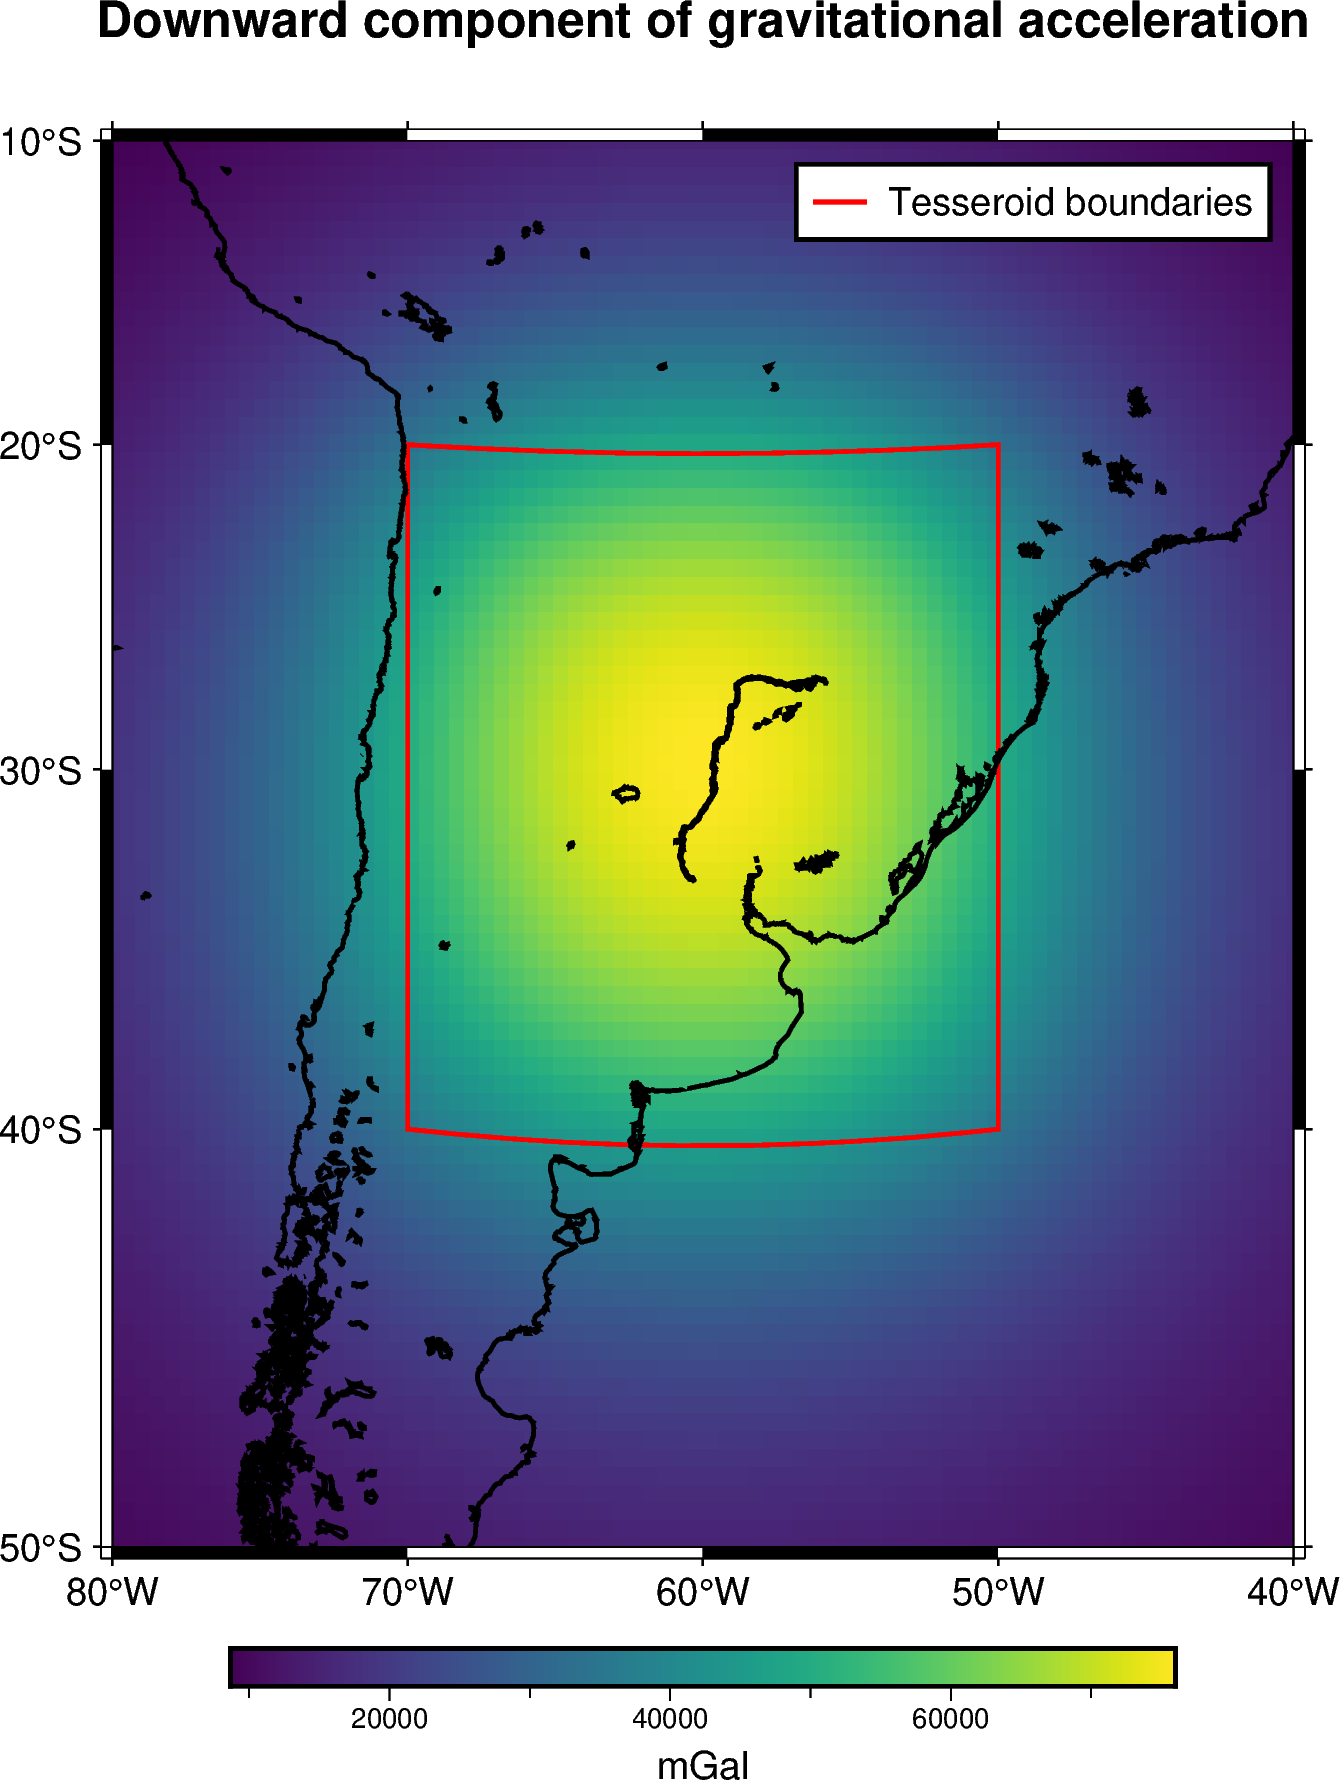

In [ ]:
coordinates = vd.grid_coordinates(
    region=[-80, -40, -50, -10],
    shape=(80, 80),
    extra_coords=100e3 + mean_radius,
)

gravity = hm.tesseroid_gravity(coordinates, tesseroid, density, field="g_z")

grid = vd.make_xarray_grid(
    coordinates, gravity, data_names="gravity", extra_coords_names="extra"
)

fig = pygmt.Figure()
title = "Downward component of gravitational acceleration"
with pygmt.config(FONT_TITLE="12p"):
    fig.grdimage(
        region=[-80, -40, -50, -10],
        projection="M-60/-30/10c",
        grid=grid.gravity,
        frame=["a", f"+t{title}"],
        cmap="viridis",
    )

# Plot edges of tesseroid
fig.plot(
    x=[tesseroid[0], tesseroid[1], tesseroid[1], tesseroid[0], tesseroid[0]],
    y=[tesseroid[2], tesseroid[2], tesseroid[3], tesseroid[3], tesseroid[2]],
    pen="1p,red",
    label="Tesseroid boundaries",
)
fig.legend()

fig.colorbar(cmap=True, frame=["x+lmGal"])
fig.coast(shorelines="1p,black")

fig.show()

In [ ]:
def plot_tesseroid(tesseroid, plot=True, add_sphere=True, add_edges=True):
    """Plot a tesseroid using PyVista."""
    lon_min, lon_max, lat_min, lat_max, r_inner, r_outer = tesseroid

    # phi (latitude) is defined as 0 at north pole and 180 at south pole in PyVista
    def lat_to_phi(lat):
        return 90 - lat

    min_phi = lat_to_phi(lat_max)
    max_phi = lat_to_phi(lat_min)

    # Create a solid sphere sector (tesseroid)
    tesseroid_mesh = pv.SolidSphere(
        outer_radius=r_outer,
        inner_radius=r_inner,
        start_theta=lon_min,  # longitude
        end_theta=lon_max,  # longitude
        start_phi=min_phi,  # latitude
        end_phi=max_phi,  # latitude
        # phi_resolution=2,
        # theta_resolution=2,
        # radius_resolution=2,
    )

    if plot:
        # Plot the tesseroid
        plotter = pv.Plotter()

        if add_sphere:
            # add wireframe sphere if entire Earth/planet for context
            sphere_mesh = pv.Sphere(
                radius=r_outer,
                # phi_resolution=2, # latitude resolution
                # theta_resolution=2, # longitude resolution
                # radius_resolution=2, # radial resolution
            )
            plotter.add_mesh(
                sphere_mesh,
                color="white",
                style="wireframe",
                opacity=0.1,
            )

        plotter.add_mesh(
            tesseroid_mesh,
            color="lightblue",
            show_edges=False,
            opacity=1,
        )

        if add_edges:
            # add wire mesh to show tesseroid edges
            mesh = pv.SolidSphere(
                outer_radius=r_outer,
                inner_radius=r_inner,
                start_theta=lon_min,  # longitude
                end_theta=lon_max,  # longitude
                start_phi=min_phi,  # latitude
                end_phi=max_phi,  # latitude
                phi_resolution=2,
                theta_resolution=2,
                radius_resolution=2,
            )
            # edges = mesh.extract_all_edges()
            edges = mesh.extract_feature_edges()
            plotter.add_mesh(
                edges,
                line_width=10,
                color="black",
            )

        plotter.add_axes()

        _mean_phi, mean_theta = (min_phi + max_phi) / 2, (lon_min + lon_max) / 2

        # set camera to look at equator from prime meridian
        cam_pos = pv.grid_from_sph_coords(
            # theta = [0], # longitude
            phi=[90],  # latitude
            theta=[mean_theta + 20],  # longitude
            # phi = [mean_phi+20], # latitude
            r=[r_outer * 10],  # distance from the origin
        )

        plotter.set_position(cam_pos.points)
        plotter.set_viewup((0, 0, 1))
        plotter.show()

    return tesseroid_mesh

/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


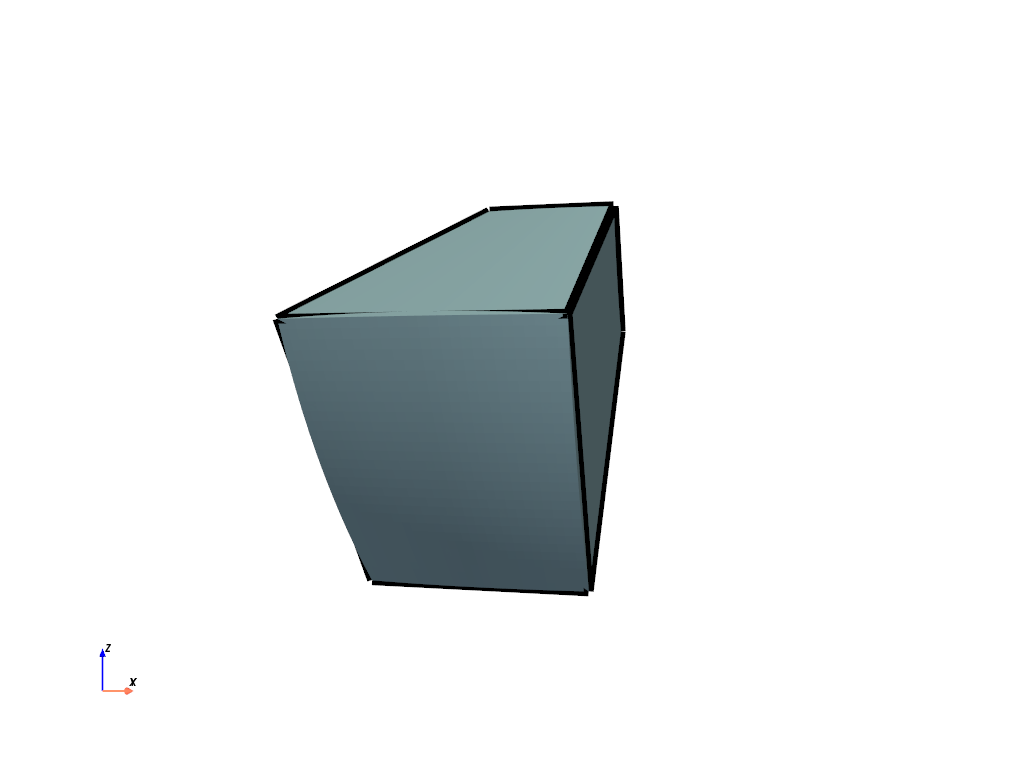

UnstructuredGrid,Information
N Cells,3364
N Points,4500
X Bounds,"8.832e+05, 3.848e+06"
Y Bounds,"-5.626e+06, -1.978e+06"
Z Bounds,"-4.095e+06, -1.153e+06"
N Arrays,0


In [170]:
plot_tesseroid(tesseroid, add_sphere=False)

# Multiple tesseroids

In [ ]:
tesseroids = [
    [-70, -65, -40, -35, mean_radius - 100e3, mean_radius],
    [-55, -50, -40, -35, mean_radius - 100e3, mean_radius],
    [-70, -65, -25, -20, mean_radius - 100e3, mean_radius],
    [-55, -50, -25, -20, mean_radius - 100e3, mean_radius],
]
densities = [2670, 2670, 2670, 2670]
coordinates = vd.grid_coordinates(
    region=[-80, -40, -50, -10],
    shape=(80, 80),
    extra_coords=100e3 + mean_radius,
)
gravity = hm.tesseroid_gravity(
    coordinates,
    tesseroids,
    densities,
    field="g_z",
)

grid = vd.make_xarray_grid(
    coordinates, gravity, data_names="gravity", extra_coords_names="extra"
)

fig = pygmt.Figure()
title = "Downward component of gravitational acceleration"
with pygmt.config(FONT_TITLE="12p"):
    fig.grdimage(
        region=[-80, -40, -50, -10],
        projection="M-60/-30/10c",
        grid=grid.gravity,
        frame=["a", f"+t{title}"],
        cmap="viridis",
    )

# Plot edges of tesseroids
for i, tesseroid in enumerate(tesseroids):
    label = "Tesseroid boundaries" if i == 0 else None
    fig.plot(
        x=[tesseroid[0], tesseroid[1], tesseroid[1], tesseroid[0], tesseroid[0]],
        y=[tesseroid[2], tesseroid[2], tesseroid[3], tesseroid[3], tesseroid[2]],
        pen="1p,red",
        label=label,
    )
fig.legend()

fig.colorbar(cmap=True, frame=["a1000f500", "x+lmGal"])
fig.coast(shorelines="1p,black")

fig.show()

NameError: name 'mean_radius' is not defined

In [2]:
def _discard_thin_tesseroids(
    tesseroids,
    density,
    thickness_threshold,
):
    """
    Discard tesseroids with a thickness below a threshold.

    Parameters
    ----------
    tesseroids : 2d-array
        Array containing the boundaries of the tesseroids in the following order:
        ``longitude_w``, ``longitude_e``, ``latitude_s``, ``latitude_n``,
           ``bottom``, ``top``.
        The array must have the following shape: (``n_tesseroids``, 6), where
        ``n_tesseroids`` is the total number of tesseroids.
    density : 1d-array
        Array containing the density of each tesseroid in kg/m^3. Must have the
        same size as the number of tesseroids.
    thickness_threshold : float
        Tesseroids thinner than this threshold will be discarded.

    Returns
    -------
    tesseroids : 2d-array
        A copy of the ``tesseroids`` array that doesn't include the thin tesseroids.
    density : 1d-array
        A copy of the ``density`` array that doesn't include the density values
        for thin tesseroids.
    """
    bottom, top = tesseroids[:, -2], tesseroids[:, -1]
    # Mark tesseroids with thickness < threshold  as null tesseroids
    thickness = top - bottom
    null_tesseroids = thickness < thickness_threshold
    # Keep only thick tesseroids and their densities
    tesseroids = tesseroids[np.logical_not(null_tesseroids), :]
    density = density[np.logical_not(null_tesseroids)]
    return tesseroids, density

# Tesseroid layer

In [ ]:
import boule as bl

import harmonica as hm

# Create a synthetic relief
longitude = np.linspace(0, 10, 5)
latitude = np.linspace(2, 8, 4)
mesh_longitude, mesh_latitude = np.meshgrid(longitude, latitude)
surface_heights = np.arange(20, dtype=float).reshape((4, 5))
# Convert heights to radii
reference_radii = bl.WGS84.geocentric_radius(mesh_latitude)
surface_radii = surface_heights + reference_radii
# Define constant densities
density = 2670.0 * np.ones_like(surface_radii)
# Define a layer of tesseroid
tesseroids = hm.tesseroid_layer(
    (longitude, latitude),
    surface_radii,
    reference=reference_radii,
    properties={"density": density},
)
# Get the boundaries of the layer (will exceed the region)
boundaries = tesseroids.tesseroid_layer.boundaries
[float(b) for b in boundaries]
# Get the boundaries of one of the tesseroids
tesseroid = tesseroids.tesseroid_layer.get_tesseroid((0, 2))
[float(b) for b in tesseroid]

[-1.25, 11.25, 1.0, 9.0]

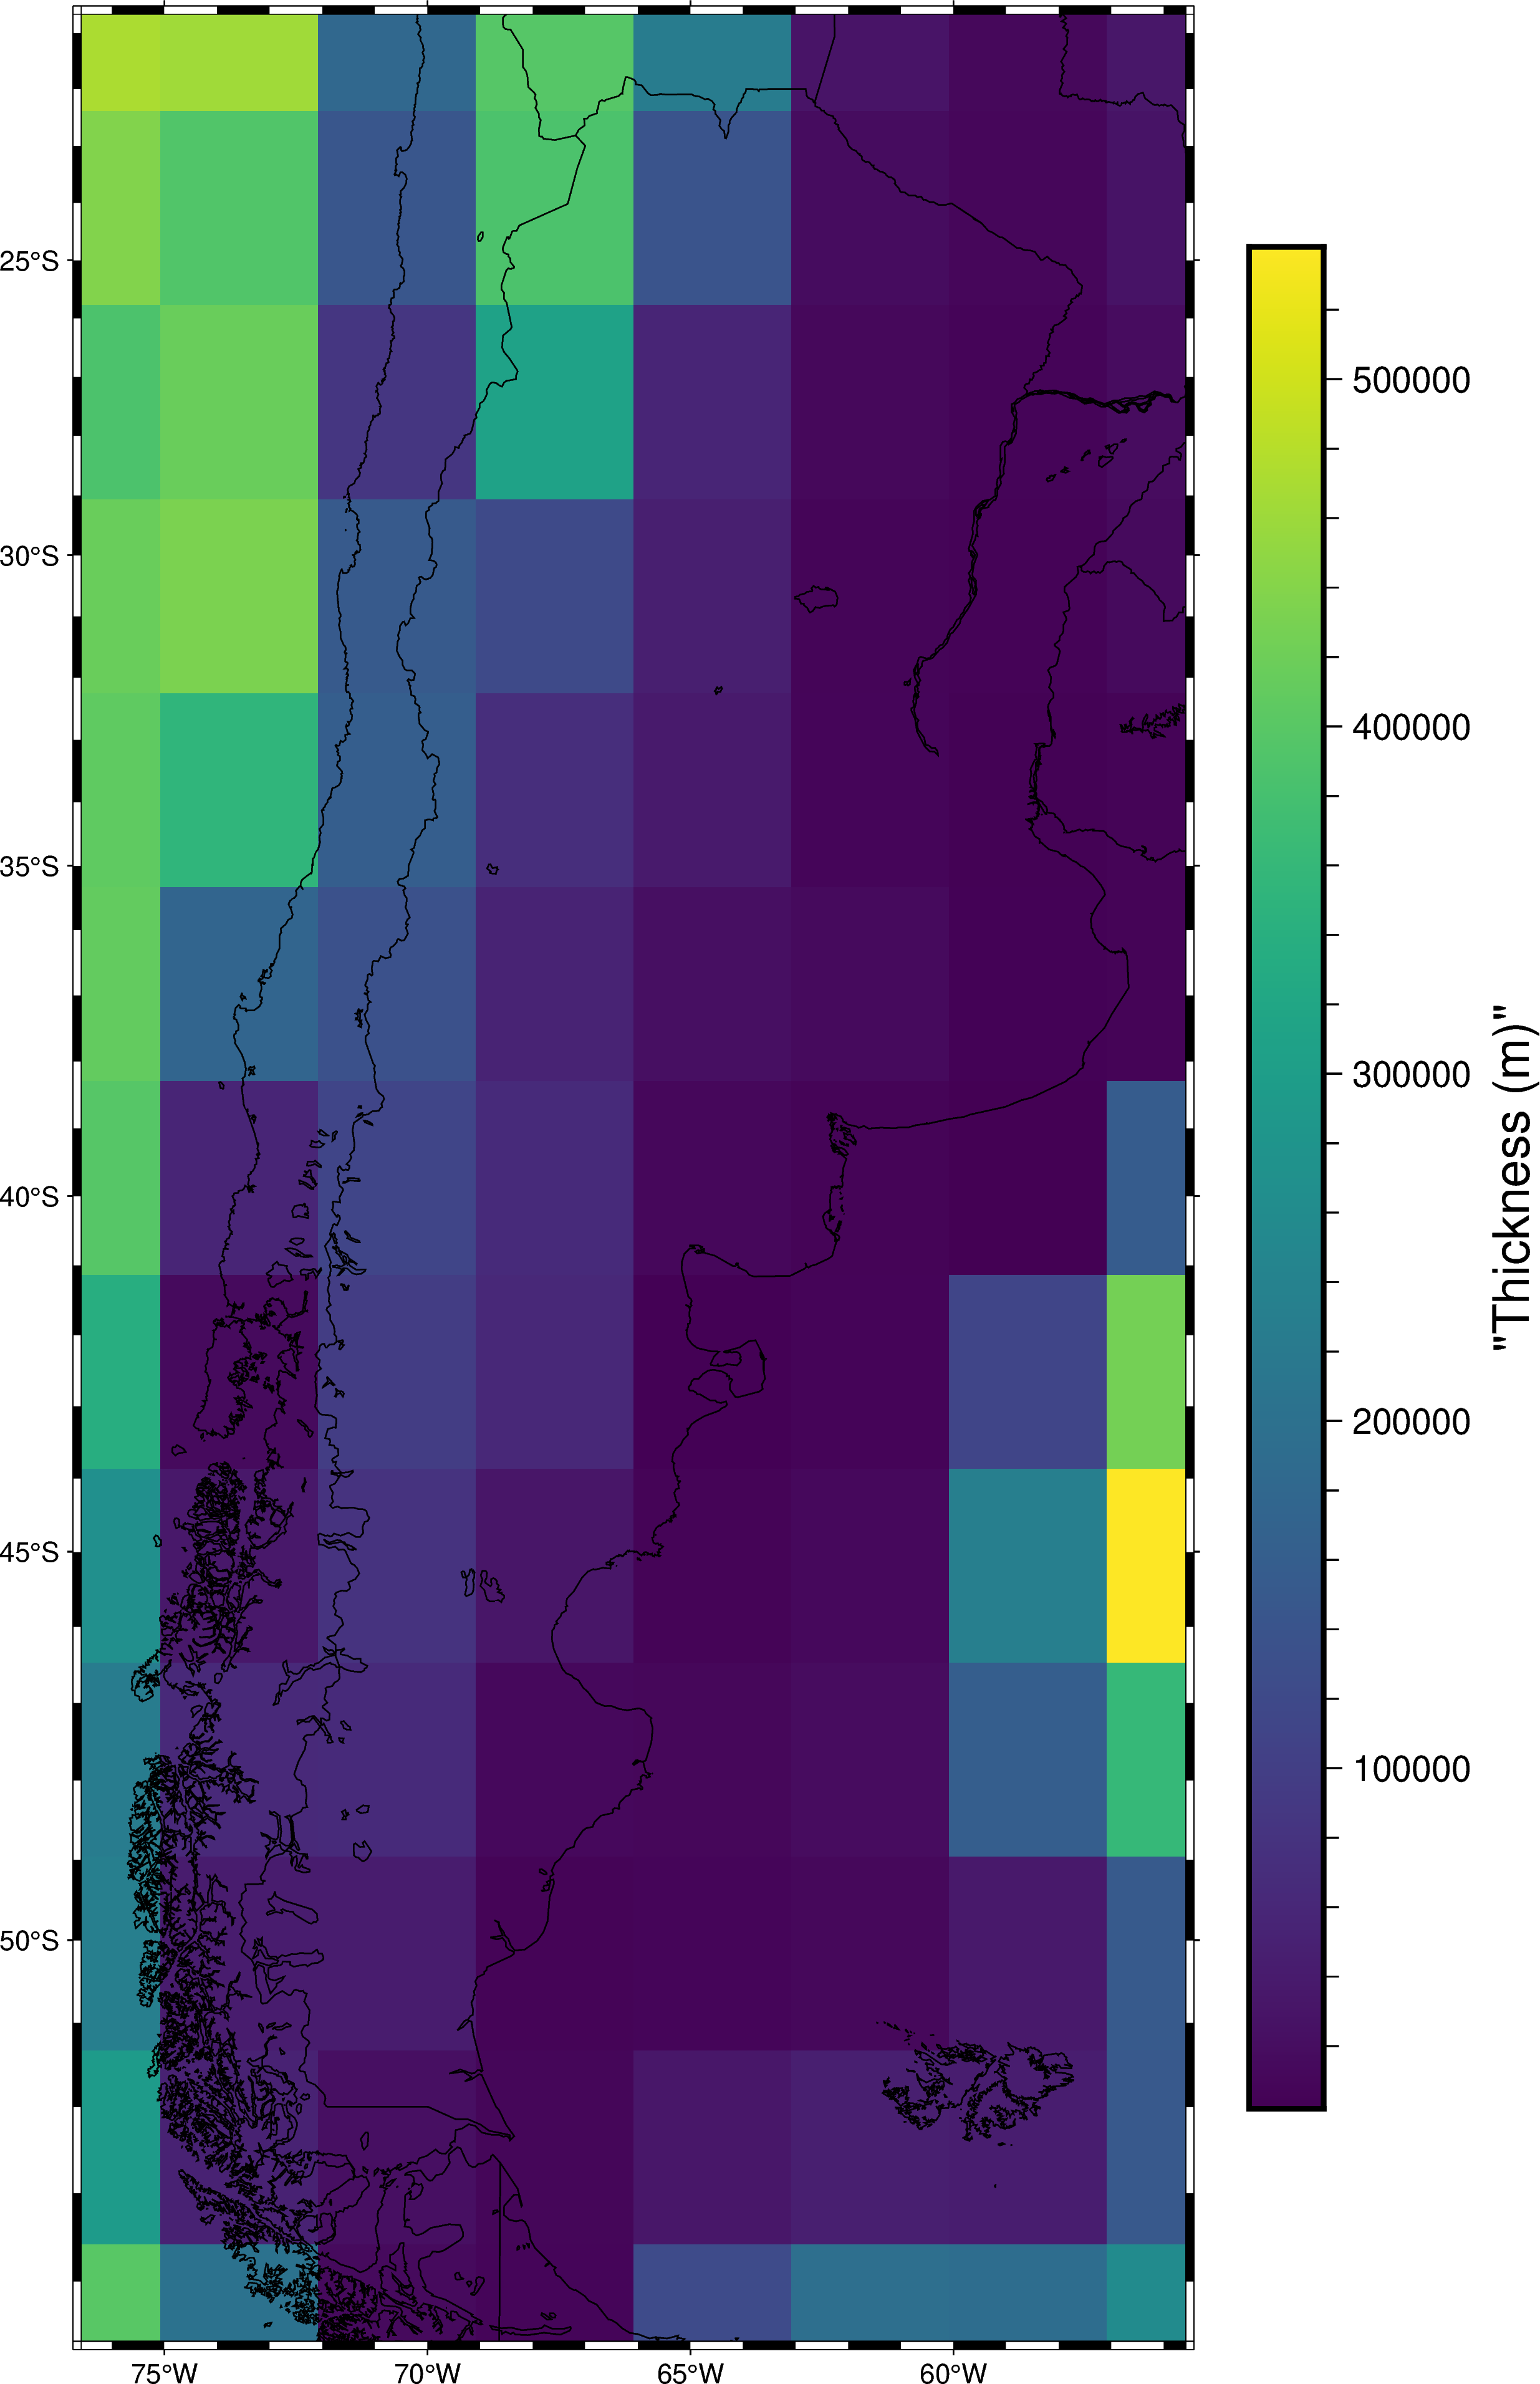

In [ ]:
fname = ensaio.fetch_earth_topography(version=1)
topo = xr.load_dataarray(fname)

# resample to coarse grid for faster processing
spacing = 3.0  # degrees
topo = topo.coarsen(
    latitude=int(spacing / np.abs(topo.latitude[1] - topo.latitude[0])),
    longitude=int(spacing / np.abs(topo.longitude[1] - topo.longitude[0])),
    boundary="trim",
).mean()

topo = topo * 100

region = (-78, -53, -57, -20)
topo = topo.sel(latitude=slice(*region[2:]), longitude=slice(*region[:2]))

ellipsoid = bl.WGS84

longitude, latitude = np.meshgrid(topo.longitude, topo.latitude)
reference = ellipsoid.geocentric_radius(latitude)
surface = topo + reference
density = xr.where(topo > 0, 2670.0, 1040.0 - 2670.0)

tesseroid_layer = hm.tesseroid_layer(
    coordinates=(topo.longitude, topo.latitude),
    surface=surface,
    reference=reference,
    properties={"density": density},
)

tesseroid_layer["thickness"] = tesseroid_layer.top - tesseroid_layer.bottom

# Plot thickness
fig = pygmt.Figure()
fig.grdimage(
    tesseroid_layer.thickness,
    projection="M15c",
    nan_transparent=True,
    cmap="viridis",
)
fig.basemap(frame=True)
fig.colorbar(frame='af+lThickness (m)', position="JCR")
fig.coast(shorelines="0.5p,black", borders=["1/0.5p,black"])
fig.show()

In [3]:
tesseroid_layer

<xarray.Dataset> Size: 3kB
Dimensions:    (latitude: 13, longitude: 8)
Coordinates:
  * latitude   (latitude) float64 104B -54.67 -51.83 -49.0 ... -23.5 -20.67
  * longitude  (longitude) float64 64B -76.58 -73.58 -70.58 ... -58.58 -55.58
    top        (latitude, longitude) float64 832B 6.364e+06 ... 6.408e+06
    bottom     (latitude, longitude) float64 832B 5.965e+06 ... 6.375e+06
Data variables:
    density    (latitude, longitude) float64 832B -1.63e+03 ... 2.67e+03
    thickness  (latitude, longitude) float64 832B 3.992e+05 ... 3.279e+04
Attributes:
    longitude_units:   degrees
    latitude_units:    degrees
    radius_units:      meters
    properties_units:  SI

In [5]:
def plot_tesseroids(tesseroids):
    """Plot tesseroids using PyVista."""

    # Plot the tesseroid
    plotter = pv.Plotter()

    # plot tesseroids
    for tesseroid in tesseroids:
        lon_min, lon_max, lat_min, lat_max, r_inner, r_outer = tesseroid

        # phi (latitude) is defined as 0 at north pole and 180 at south pole in PyVista
        def lat_to_phi(lat):
            return 90 - lat

        min_phi = lat_to_phi(lat_max)
        max_phi = lat_to_phi(lat_min)

        # Create a solid sphere sector (tesseroid)
        tesseroid_mesh = pv.SolidSphere(
            outer_radius=r_outer,
            inner_radius=r_inner,
            start_theta=lon_min,  # longitude
            end_theta=lon_max,  # longitude
            start_phi=min_phi,  # latitude
            end_phi=max_phi,  # latitude
            # phi_resolution=2,
            # theta_resolution=2,
            # radius_resolution=2,
        )

        plotter.add_mesh(
            tesseroid_mesh,
            color="lightblue",
            show_edges=False,
            opacity=1,
        )

        # # add wire mesh to show tesseroid edges
        # mesh = pv.SolidSphere(
        #     outer_radius=r_outer,
        #     inner_radius=r_inner,
        #     start_theta=lon_min,  # longitude
        #     end_theta=lon_max,    # longitude
        #     start_phi=min_phi,    # latitude
        #     end_phi=max_phi,      # latitude
        #     phi_resolution=2,
        #     theta_resolution=2,
        #     radius_resolution=2,
        # )
        # edges = mesh.extract_all_edges()
        # plotter.add_mesh(
        #     edges,
        #     line_width=2,
        #     color="black",
        # )

    plotter.add_axes()

    # mean_phi, mean_theta = (min_phi + max_phi)/2, (lon_min + lon_max)/2

    # # set camera to look at equator from prime meridian
    # cam_pos = pv.grid_from_sph_coords(
    #     # theta = [0], # longitude
    #     phi = [90], # latitude
    #     theta = [mean_theta+20], # longitude
    #     # phi = [mean_phi+20], # latitude
    #     r = [r_outer*10], # distance from the origin
    # )

    # plotter.set_position(cam_pos.points)
    # plotter.set_viewup((0,0,1))
    plotter.show()

In [6]:
# extract tesseroids from the layer
tesseroids = tesseroid_layer.tesseroid_layer._to_tesseroids()

# discard thin tesseroids
density = tesseroid_layer.tesseroid_layer._obj.density.values
mask = tesseroid_layer.tesseroid_layer._get_nonans_mask(property_name="density")
density = density[mask]
tesseroids = _discard_thin_tesseroids(
    tesseroids,
    density,
    1,
)[0]

/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


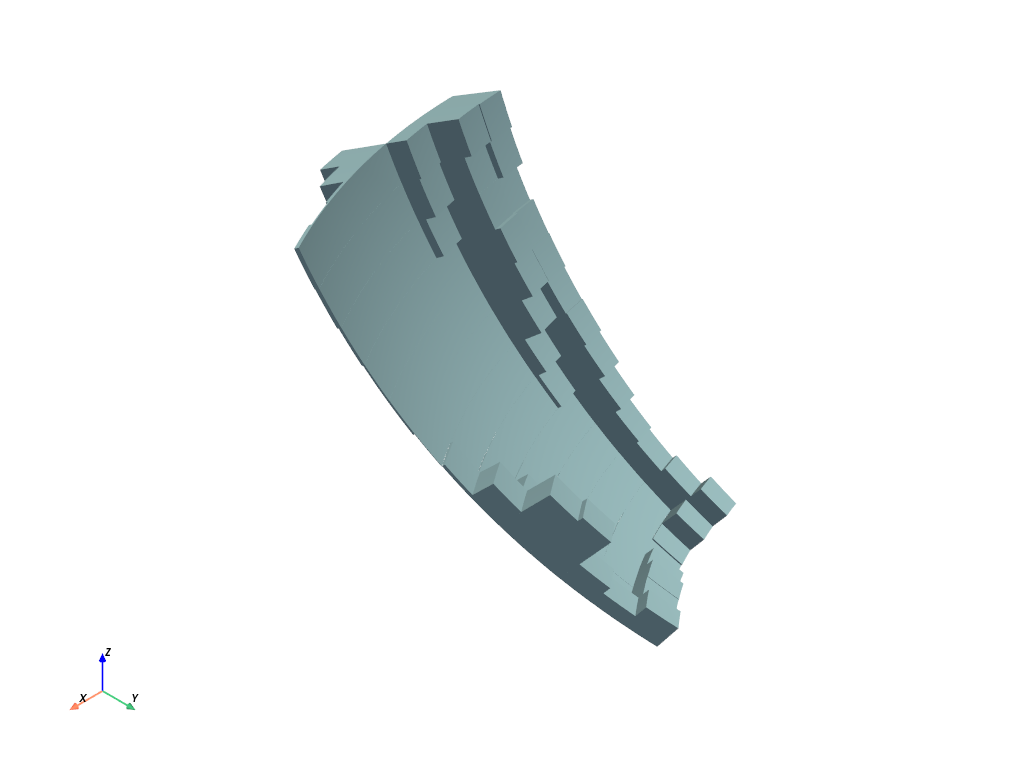

In [181]:
plot_tesseroids(tesseroids)

In [385]:
tesseroid_layer

<xarray.Dataset> Size: 3kB
Dimensions:    (latitude: 13, longitude: 8)
Coordinates:
  * latitude   (latitude) float64 104B -54.67 -51.83 -49.0 ... -23.5 -20.67
  * longitude  (longitude) float64 64B -76.58 -73.58 -70.58 ... -58.58 -55.58
    top        (latitude, longitude) float64 832B 6.364e+06 ... 6.408e+06
    bottom     (latitude, longitude) float64 832B 5.965e+06 ... 6.375e+06
Data variables:
    density    (latitude, longitude) float64 832B -1.63e+03 ... 2.67e+03
    thickness  (latitude, longitude) float64 832B 3.992e+05 ... 3.279e+04
Attributes:
    longitude_units:   degrees
    latitude_units:    degrees
    radius_units:      meters
    properties_units:  SI

In [ ]:
def plot_tesseroid_layer(tesseroid_layer, add_sphere=True):
    """Plot a tesseroid using PyVista. This plots 1 large tesseroid, then adds some
    grid lines to denote each separate tesseroid.
    """

    # extract tesseroids from the layer
    tesseroids = tesseroid_layer.tesseroid_layer._to_tesseroids()
    density = tesseroid_layer.tesseroid_layer._obj.density.values

    # discard thin tesseroids
    mask = tesseroid_layer.tesseroid_layer._get_nonans_mask(property_name="density")
    density = density[mask]
    tesseroids = _discard_thin_tesseroids(
        tesseroids,
        density,
        1,
    )[0]

    # get arrays of boundaries
    lon_mins = [i[0] for i in tesseroids]
    lon_maxs = [i[1] for i in tesseroids]
    lat_mins = [i[2] for i in tesseroids]
    lat_maxs = [i[3] for i in tesseroids]
    r_inners = [i[4] for i in tesseroids]
    r_outers = [i[5] for i in tesseroids]

    # # transform latitudes to be centered at north pole
    # mean_lat = np.mean(np.array([lat_mins, lat_maxs]))
    # print(mean_lat)
    # lat_mins = [90-np.abs(x-mean_lat) for x in lat_mins]
    # lat_maxs = [90-np.abs(x-mean_lat) for x in lat_maxs]
    # print(min(lat_mins), max(lat_maxs))

    # phi (latitude) is defined as 0 at north pole and 180 at south pole in PyVista
    min_phis = [90 - x for x in lat_maxs]
    max_phis = [90 - x for x in lat_mins]

    # transform latitudes to be centered at north pole
    # mean_phi = np.mean(np.array([min_phis, max_phis]))
    # min_phis = [np.abs(x-mean_phi) for x in min_phis]
    # max_phis = [np.abs(x-mean_phi) for x in max_phis]
    # print(min(min_phis), max(max_phis))

    # # transform longitudes to be centered at 0deg
    # mean_lon = np.mean(np.array([lon_mins, lon_maxs]))
    # lon_mins = [x-(mean_lon) for x in lon_mins]
    # lon_maxs = [x-(mean_lon) for x in lon_maxs]

    mean_theta = np.mean(np.array([lon_mins, lon_maxs]))
    mean_phi = np.mean(np.array([min_phis, max_phis]))

    plotter = pv.Plotter()

    if add_sphere:
        # Create and plot the semi-transparent shell of a sphere
        sphere_mesh = pv.Sphere(radius=np.mean([r_outers, r_inners]))
        plotter.add_mesh(sphere_mesh, color="white", style="wireframe", opacity=0.1)

    # loop through each tesseroid, generate its mesh, and append to a list
    meshes = []
    edges = []
    for i, _j in enumerate(tesseroids):
        # Create a solid sphere sector (tesseroid)
        tesseroid_mesh = pv.SolidSphere(
            outer_radius=r_outers[i],
            inner_radius=r_inners[i],
            start_theta=lon_mins[i],  # longitude
            end_theta=lon_maxs[i],  # longitude
            start_phi=min_phis[i],  # latitude
            end_phi=max_phis[i],  # latitude
            phi_resolution=5,  # resolutions of 2 will be flat faces
            theta_resolution=5,
            radius_resolution=5,
        )
        plotter.add_mesh(
            tesseroid_mesh,
            # color="lightblue",
            scalars=[density[i]] * tesseroid_mesh.n_cells,
            cmap="viridis",
            show_edges=False,
            opacity=1,
        )

        meshes.append(tesseroid_mesh)
        tesseroid_edge = pv.SolidSphere(
            outer_radius=r_outers[i],
            inner_radius=r_inners[i],
            start_theta=lon_mins[i],  # longitude
            end_theta=lon_maxs[i],  # longitude
            start_phi=min_phis[i],  # latitude
            end_phi=max_phis[i],  # latitude
            phi_resolution=2,
            theta_resolution=2,
            radius_resolution=2,
        )
        edge = tesseroid_edge.extract_feature_edges()
        edges.append(edge)

    transform = pv.Transform()
    transform.rotate_x(-mean_phi)  # rotate so latitude is at north pole
    # transform.rotate_z(180-mean_theta) # rotate so longitude is at prime meridian (180)

    # # plot merged mesh of all tesseroids
    # mesh = pv.merge(meshes)
    # # mesh = mesh.transform(transform, inplace=False)
    # print(mesh)
    # plotter.add_mesh(
    #     mesh,
    #     color="lightblue",
    #     cmap="viridis",
    #     show_edges=False,
    #     opacity=1,
    # )

    # plot merged edges of all tesseroids
    edges = pv.merge(edges)
    # edges = edges.transform(transform, inplace=False)
    plotter.add_mesh(edges, line_width=2, color="black")

    # r = r_outer_max*10
    # phi = 90
    # theta = np.mean(np.array([lon_min, lon_max]))
    # print(r, phi, theta)
    # print(pv.spherical_to_cartesian(r, phi, theta))

    # set camera to look at equator from prime meridian

    # cam_pos = pv.grid_from_sph_coords(
    #     phi = 0, # latitude
    #     theta = 90, # longitude
    #     # phi = [mean_phi], # latitude
    #     r = [np.max(r_outers)*3], # distance from the origin
    # )
    # plotter.set_position(cam_pos.points)

    # plotter.camera_position = [
    #     (0.0, 0.0, 1.0),
    #     (0.0, 0.0, 0.0),
    #     (0.0, 1.0, 0.0)
    # ]
    # plotter.camera_position = 'yz' # looking directly at prime meridian and equator
    mean_radius = np.mean([r_outers, r_inners])

    plotter.camera_position = "yz"  # looking directly at prime meridian and equator
    # plotter.camera.distance=12e6
    plotter.camera.distance = mean_radius * 1.5
    plotter.camera.clipping_range = (mean_radius * 0.5, mean_radius * 3)
    plotter.camera.azimuth = mean_theta - 90
    plotter.camera.roll = mean_phi + 90
    plotter.camera.elevation = 10

    plotter.add_axes()
    # plotter.show_grid()
    # plotter.show()

    return plotter

In [407]:
plotter = plot_tesseroid_layer(
    tesseroid_layer,
    add_sphere=False,
)

mean_theta: -66.08333333333334, mean_phi: 127.66666666666667
6334682.131887221
Camera (0x7f3e42e3ae00)
  Position:            (-4883641.116362658, -9353545.545712134, -4625712.260412406)
  Focal Point:         (3141031.037858445, -4365912.591440106, -3617446.8276798343)
  Parallel Projection: False
  Distance:            9502023.197830832
  Thickness:           15836705.329718053
  Parallel Scale:      2724055.8834156445
  Clipping Range:      (3167341.0659436104, 19004046.395661663)
  View Angle:          30.0
  Roll:                -138.98348238006494


/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


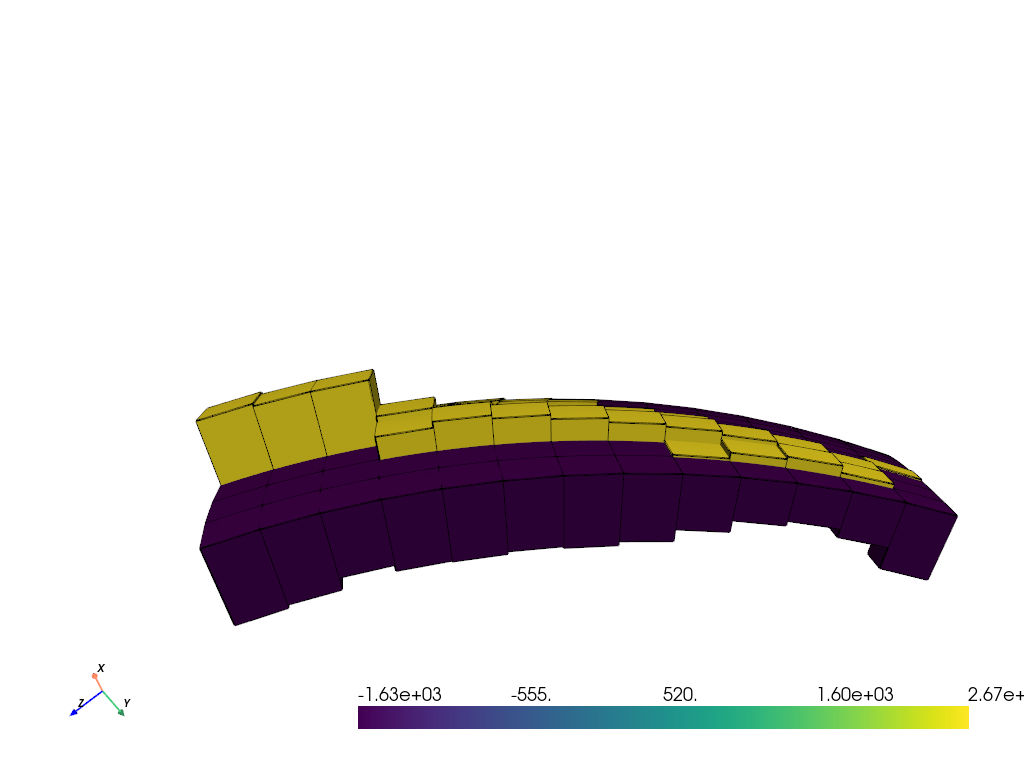

In [408]:
plotter.show()

In [ ]:
# # Project the grid
# import pyproj

# projection = pyproj.Proj(proj="merc", lat_ts=da.latitude.values.mean())
# da = vd.project_grid(da, projection=projection)
# da = da[10:23, 10:18]
# da

<xarray.DataArray 'topography' (northing: 13, easting: 8)> Size: 832B
array([[-5027.35353599, -5022.56887127, -5017.22847872, -5011.47847872,
        -5005.9586783 , -5001.015152  , -4999.64600582, -5000.08195612],
       [-5011.00613722, -5006.02286526, -5000.66862188, -4996.68830449,
        -4994.02163782, -4991.9033141 , -4992.70257763, -4995.03591097],
       [-5000.4698694 , -4995.13653607, -4990.08241531, -4987.74908197,
        -4986.19926558, -4985.64944918, -4987.54120765, -4991.27060383],
       [-4995.50226139, -4990.77764148, -4986.90027788, -4984.15027788,
        -4982.89847961, -4983.23181295, -4986.11590647, -4990.11590647],
       [-4997.3376984 , -4992.31713788, -4988.70701264, -4986.83988093,
        -4985.96324403, -4985.6299107 , -4987.7532738 , -4991.48162202],
       [-5001.43401706, -4998.21633131, -4995.52041414, -4993.52041414,
        -4992.08571986, -4991.21633131, -4992.34694276, -4995.47755421],
       [-5007.74898964, -5005.76113601, -5004.69231023, -5002.16329512,
        -5000.16329512, -4998.89878757, -4999.03643912, -5000.36977245],
       [-5012.37390502, -5012.51459374, -5011.56085753, -5009.56085753,
        -5007.46643259, -5005.13309926, -5005.13309926, -5005.13309926],
       [-5013.84889281, -5013.9244464 , -5013.77333921, -5012.28889868,
        -5011.28889868, -5010.24446403, -5009.39557122, -5007.84889281],
       [-5013.1575228 , -5012.85044327, -5012.63097456, -5012.38097456,
        -5011.8424772 , -5011.8424772 , -5010.8424772 , -5008.33333333],
       [-5013.27875656, -5012.38791011, -5012.06139887, -5011.74853183,
        -5011.4151985 , -5011.16373032, -5009.32746065, -5006.32746065],
       [-5013.0565766 , -5012.        , -5011.16972979, -5010.16972979,
        -5009.34558584, -5007.67891917, -5005.67891917, -5002.67891917],
       [-5010.80139   , -5009.31024458, -5007.70208499, -5006.45651229,
        -5004.87760624, -5002.87760624, -5000.05312749, -4996.56198207]])
Coordinates:
  * northing  (northing) float64 104B -3.48e+06 -3.478e+06 ... -3.458e+06
  * easting   (easting) float64 64B 1.01e+06 1.011e+06 ... 1.019e+06 1.02e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

In [ ]:
# # Create a 2d array with the density of the prisms Points above the geoid will
# # have a density of 2670 kg/m^3 Points below the geoid will have a density
# # contrast equal to the difference between the density of the ocean and the
# # density of the upper crust: # 1000 kg/m^3 - 2900 kg/m^3
# density = da.copy()  # copy topography to a new xr.DataArray
# density.values[:] = 2670.0  # replace every value for the density of the topography
# # Change density values of ocean points
# density = density.where(da >= 0, 1000 - 2900)

# # Create layer of prisms
# prisms = hm.prism_layer(
#     (da.easting, da.northing),
#     surface=da,
#     reference=0,
#     properties={"density": density},
# )
# prisms

<xarray.Dataset> Size: 3kB
Dimensions:   (northing: 13, easting: 8)
Coordinates:
  * northing  (northing) float64 104B -3.48e+06 -3.478e+06 ... -3.458e+06
  * easting   (easting) float64 64B 1.01e+06 1.011e+06 ... 1.019e+06 1.02e+06
    top       (northing, easting) float64 832B 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    bottom    (northing, easting) float64 832B -5.027e+03 ... -4.997e+03
Data variables:
    density   (northing, easting) float64 832B -1.9e+03 -1.9e+03 ... -1.9e+03
Attributes:
    coords_units:      meters
    properties_units:  SI

In [ ]:
# pv_grid = prisms.prism_layer.to_pyvista()
# pv_grid

UnstructuredGrid (0x7fdf1c625ae0)
  N Cells:    104
  N Points:   832
  X Bounds:   1.009e+06, 1.021e+06
  Y Bounds:   -3.481e+06, -3.457e+06
  Z Bounds:   -5.027e+03, 0.000e+00
  N Arrays:   1

/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/sungw937/miniforge3/envs/harmonica/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


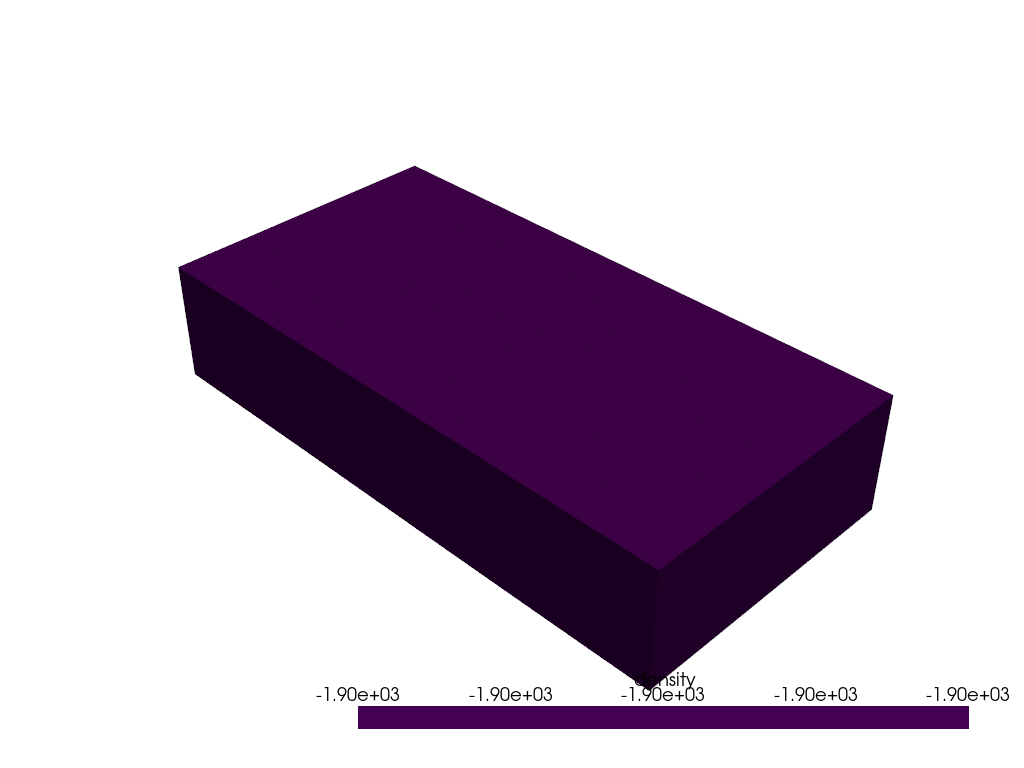

In [ ]:
# # Plot with pyvista
# plotter = pv.Plotter()
# plotter.add_mesh(pv_grid, scalars="density")
# plotter.show()